In [1]:
import data_preprocessing
from data_preprocessing import*

trainPath='train.tsv'
testPath='liar_dataset/test.tsv'
validationPath='liar_dataset/valid.tsv'

train,y,test,testY,val,valY=data_preprocess(trainPath,testPath,validationPath,pred="single")

In [2]:
print(train)

['say the anni list polit group support third trimest abort on demand', 'when did the declin of coal start it start when natur gas took off that start to begin in presid georg bush administr', 'hillari clinton agre with john mccain by vote to give georg bush the benefit of the doubt on iran', 'the chicago bear have had more start quarterback in the last year than the total number of tenur uw faculti fire dure the last two decad', 'i the onli person on this stage who has work activ just last year pass along with russ feingold some of the toughest ethic reform sinc waterg', 'say gop primari oppon glenn grothman and joe leibham cast compromis vote that cost million in higher electr cost', 'for the first time in histori the share of the nation popular vote margin is smaller than the latino vote margin', 'sinc near million american have slip out of the middl class and into poverti', 'when mitt romney was governor of massachusett we didnt just slow the rate of growth of our govern we actual 

In [3]:
print(y)

[0 0 1 ... 0 0 0]


In [4]:
# import necessary packages
import pandas as pd
import numpy as np

import seaborn as sns

import nltk
from nltk.stem import PorterStemmer #for stemming
from nltk.tokenize import word_tokenize
import nltk.corpus

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn import svm
from mlxtend.evaluate import bias_variance_decomp
from gensim.models.word2vec import Word2Vec

import matplotlib.pyplot as plt
import pickle

import warnings
warnings.filterwarnings("ignore")

In [5]:
# load all three datasets
trainFile = 'train.tsv'
testFile = 'test.tsv'
valFile = 'valid.tsv'

# add header to all three datasets
traindata = pd.read_csv(trainFile, delimiter='\t', encoding='utf-8', names=
                        ["json ID", "label", "statement", "subject", "speaker", "job title", "state", "party",
                         "barely true", "false", "half true", "mostly true", "pants on fire", "los", "justification"])
traindata.name = 'Training Data'

testdata = pd.read_csv(testFile, delimiter='\t', encoding='utf-8', names=
                        ["json ID", "label", "statement", "subject", "speaker", "job title", "state", "party",
                         "barely true", "false", "half true", "mostly true", "pants on fire", "los", "justification"])
testdata.name = 'Testing Data'

valdata = pd.read_csv(valFile, delimiter='\t', encoding='utf-8', names=
                        ["json ID", "label", "statement", "subject", "speaker", "job title", "state", "party",
                         "barely true", "false", "half true", "mostly true", "pants on fire", "los", "justification"])
valdata.name = 'Validation Data'

In [6]:
print(traindata.shape)
print(testdata.shape)
print(valdata.shape)

(10240, 15)
(1267, 15)
(1284, 15)


In [7]:
# function to get shape of each dataset
def cal_size(dataset):
  print(dataset.shape)

In [8]:
# function to check distribution of labels
def check_dist(dataset):
  sns.countplot(x='label', data=traindata, palette='hls')

In [9]:
asd = pd.DataFrame(traindata['label'])

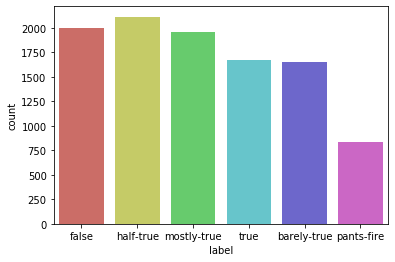

In [10]:
check_dist(traindata)

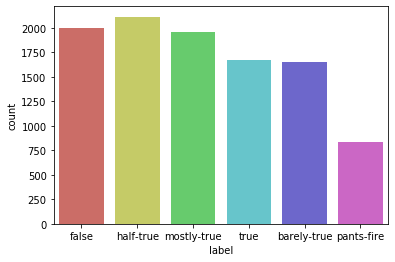

In [11]:
check_dist(valdata)

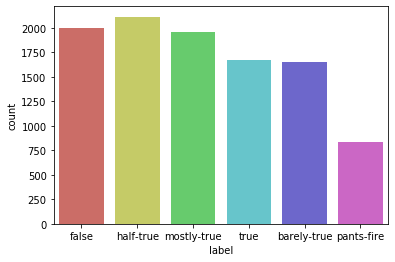

In [12]:
check_dist(testdata)

In [13]:
# check for missing labels
def check_missLabel(dataset):
#   dataset.info()
  print("Missing label values in {} are {}".format(dataset.name,dataset['label'].isnull().sum()))
  print("----------------------------------------------------------------")
check_missLabel(traindata)
check_missLabel(valdata)
check_missLabel(testdata)
# concatenate validation data with training data
traindata = pd.concat([valdata])
# merge 'statement' and 'justification' columns
traindata['new'] = traindata['statement'].map(str) + traindata['justification'].map(str)


Missing label values in Training Data are 0
----------------------------------------------------------------
Missing label values in Validation Data are 0
----------------------------------------------------------------
Missing label values in Testing Data are 0
----------------------------------------------------------------


In [14]:
traindata['new'].iloc[0:1].values
# Convert text to word count vectors with CountVectorizer
# create the transform
cvec = CountVectorizer()

# tokenize, build vocab and encode training data
traindata_cvec = cvec.fit_transform(traindata['new'].values)

# summarize
print(cvec.vocabulary_)
# print(cvec.get_feature_names())

{'we': 4242, 'have': 1904, 'less': 2353, 'americans': 348, 'working': 4320, 'now': 2742, 'than': 3932, 'in': 2054, 'the': 3941, '70s': 158, 'nan': 2669, 'when': 4267, 'obama': 2759, 'was': 4228, 'sworn': 3863, 'into': 2136, 'office': 2779, 'he': 1910, 'did': 1252, 'not': 2737, 'use': 4138, 'holy': 1973, 'bible': 567, 'but': 701, 'instead': 2116, 'kuran': 2282, 'their': 3943, 'equivalency': 1473, 'to': 3981, 'our': 2837, 'very': 4161, 'different': 1260, 'beliefs': 550, 'says': 3493, 'having': 1906, 'organizations': 2828, 'parading': 2888, 'as': 422, 'being': 549, 'social': 3668, 'welfare': 4256, 'and': 357, 'then': 3946, 'involved': 2154, 'political': 3030, 'combat': 924, 'harkens': 1893, 'back': 478, 'why': 4281, 'statute': 3765, 'hundred': 2002, 'years': 4338, 'ago': 290, 'said': 3464, 'that': 3935, 'they': 3951, 'were': 4260, 'prohibited': 3131, 'nearly': 2690, 'half': 1880, 'of': 2771, 'oregons': 2825, 'children': 835, 'are': 404, 'poor': 3041, 'on': 2791, 'attacks': 444, 'by': 705,

In [15]:
# summarize encoded vector
print(traindata_cvec.shape)
print(type(traindata_cvec))
print(traindata_cvec.toarray())

(1284, 4358)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [16]:
# Calculate inverse document frequencies
# create the transform
tfidf_vec = TfidfTransformer()

# tokenize, build vocab and encode training data
traindata_tfidf_vec = tfidf_vec.fit_transform(traindata_cvec)

In [17]:
# tfidf score
tfidf_vec.transform(traindata_cvec)

<1284x4358 sparse matrix of type '<class 'numpy.float64'>'
	with 21991 stored elements in Compressed Sparse Row format>

In [18]:
# summarize encoded vector
print(traindata_tfidf_vec.shape)
print(traindata_tfidf_vec.toarray())

# tfidf + ngrams
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2), use_idf=True, smooth_idf=True)
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(traindata['new'].values)

# print(tfidf_ngram.toarray())
# tfidf.vocabulary_
first_vector_tfidfvectorizer = tfidf_vectorizer_vectors[0]


# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

(1284, 4358)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


,tfidf
working 70s,0.448732
70s nan,0.448732
70s,0.448732
americans working,0.424360
working,0.365404
...,...
extended long,0.000000
extending,0.000000
extending medicine,0.000000
extension,0.000000


In [19]:
nltk.download('treebank')
nltk.download('universal_tagset')

# POS tagging using CRF
tagged_sentence = nltk.corpus.treebank.tagged_sents(tagset='universal')
# print(len(tagged_sentence))

# load training sentences
training_sentences = traindata['new']
# print(training_sentences)

# function to extract features from dataset
def features(sentence, index):
  #returns a dictionary containing extracted features
  return {
      'is_first_capital': int(sentence[index][0].isupper()),
      'is_first_word': int(index==0),
      'is_last_word': int(index==len(sentence)-1),
      'is_complete_capital': int(sentence[index].upper()==sentence[index]),
      'is_complete_lower': int(sentence[index].lower()==sentence[index]),
      'prev_word':'' if index==0 else sentence[index-1],
      'next_word':'' if index==len(sentence)-1 else sentence[index+1],
      'is_numeric': int(sentence[index].isdigit()),
      'is_alphanumeric': int(bool((re.match('^(?=.*[0-9]$)(?=.*[a-zA-Z])',sentence[index])))),
      'prefix_1': sentence[index][0],
      'prefix_2': sentence[index][:2],
      'prefic_3': sentence[index][:3],
      'prefix_4': sentence[index][:4],
      'suffix_1': sentence[index][-1],
      'suffix_2': sentence[index][-2:],
      'suffix_3': sentence[index][-3:],
      'suffix_4': sentence[index][-4:],
      'word_has_hyphen': 1 if '-' in sentence[index] else 0
  }

# function to strip tags from tagged corpus
def untag(sentence):
  return [word for word,tag in sentence]



[nltk_data] Downloading package treebank to /Users/mac/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/mac/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [31]:
# using random forest
rf_pipeline_cv = Pipeline([
    ('rfCV', cvec),
    ('rf_model', RandomForestClassifier(n_estimators=400, n_jobs=4))
])

rf_pipeline_cv.fit(traindata['new'], traindata['label'])
predictions_rf = rf_pipeline_cv.predict(testdata['statement'])
rf_cv = np.mean(predictions_rf == testdata['label'])

print(rf_cv)

0.22573007103393844


In [21]:
def kFoldCV(model):
  k_fold = KFold(n_splits=5)
  scores = []
  conf_matrix = np.zeros(shape=(6,6))
  
  for train_index, test_index in k_fold.split(traindata['new']):
    trainText = traindata.iloc[train_index]['new']
    train_y = traindata.iloc[train_index]['label']
    
    testText = traindata.iloc[test_index]['new']
    test_y = traindata.iloc[test_index]['label']
    
    model.fit(trainText, train_y)
    pred_y = model.predict(testText)
    
    conf_matrix += confusion_matrix(test_y, pred_y)
    scores.append(f1_score(test_y, pred_y, average='micro'))
    
  return (print('Total statements classified:', len(traindata)),
         print('Score:', sum(scores)/len(scores)),
         print('Confusion Matrix:'),
         print(conf_matrix),
         print("---------------------------------------------------"))

In [30]:
kFoldCV(rf_pipeline_cv)

Total statements classified: 1284
Score: 0.23051738813229572
Confusion Matrix:
[[ 24. 118.  32.  55.   2.   6.]
 [ 34. 139.  36.  40.   3.  11.]
 [ 30.  87.  50.  66.   5.  10.]
 [ 24.  94.  45.  71.   0.  17.]
 [ 11.  61.  14.  24.   5.   1.]
 [ 13.  55.  44.  49.   1.   7.]]
---------------------------------------------------


(None, None, None, None, None)

In [32]:
# using random forest
rf_pipeline_ngram = Pipeline([
    ('rfCV', tfidf_vectorizer),
    ('rf_model', RandomForestClassifier(n_estimators=400, n_jobs=4))
])

rf_pipeline_ngram.fit(traindata['new'], traindata['label'])
predictions_rf = rf_pipeline_ngram.predict(testdata['statement'])
rf_ngram = np.mean(predictions_rf == testdata['label'])

In [24]:
print(rf_ngram)

0.22415153906866614
0.22730860299921074
0.23362273086029992
0.22257300710339384


In [29]:
kFoldCV(rf_pipeline_ngram)

Total statements classified: 1284
Score: 0.21885031614785994
Confusion Matrix:
[[ 15. 142.  21.  39.   7.  13.]
 [ 16. 174.  20.  41.   4.   8.]
 [ 19. 130.  25.  56.   7.  11.]
 [ 19. 125.  31.  54.   5.  17.]
 [  1.  82.  11.  13.   7.   2.]
 [ 12.  88.  18.  44.   1.   6.]]
---------------------------------------------------


(None, None, None, None, None)

In [26]:
from sklearn.ensemble import RandomForestClassifier
for i in range(1,20):
    get_accuracy(train,y,test,testY,TfidfVectorizer(ngram_range=(1,2),binary=True,max_features=400),RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt'),show_coefficients=False)

Accuracy is 0.7854630715123095
Accuracy is 0.7854630715123095
Accuracy is 0.7913247362250879
Accuracy is 0.7901524032825322
Accuracy is 0.7866354044548651
Accuracy is 0.7878077373974208
Accuracy is 0.7831184056271981
Accuracy is 0.7842907385697538
Accuracy is 0.7854630715123095
Accuracy is 0.7889800703399765
Accuracy is 0.7913247362250879
Accuracy is 0.7854630715123095
Accuracy is 0.7866354044548651
Accuracy is 0.7878077373974208
Accuracy is 0.7842907385697538
Accuracy is 0.7842907385697538
Accuracy is 0.7866354044548651
Accuracy is 0.7878077373974208
Accuracy is 0.7866354044548651


In [28]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


# estimate bias and variance
model = TfidfVectorizer(ngram_range=(1,2),max_features=400)
#lr = LogisticRegression(max_iter=300)
lr = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
review_model=model.fit_transform(trainX)
test_model = model.transform(testX)
#print(review_model)
#review_train,review_test,target_train,target_test=train_test_split(review_model,y,test_size=0.2,random_state=0)
final_model=lr.fit(review_model,trainY)
print(final_model)
mse, bias, var = bias_variance_decomp(final_model, review_model, trainY, test_model, testY, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
MSE: 0.211
Bias: 0.199
Variance: 0.012
